In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r'C:\Users\ELCOT\Downloads\8 python\penguins.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [6]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [8]:
df.shape

(344, 5)

In [9]:
df.dropna(inplace=True)
df.shape

(335, 5)

In [10]:
df.duplicated().sum()

0

In [11]:
df['sex'].value_counts()

MALE      169
FEMALE    165
.           1
Name: sex, dtype: int64

In [12]:
df.drop(df[df['sex']=='.'].index, inplace = True)
df.sex.value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

In [13]:
numeric_col=[]
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric_col.append(col)
print(numeric_col)

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


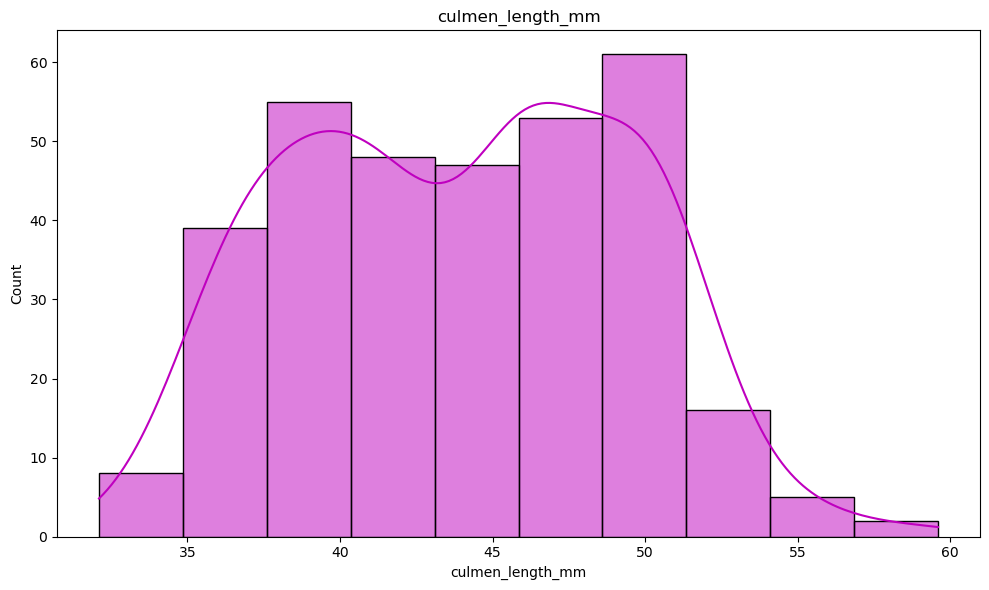

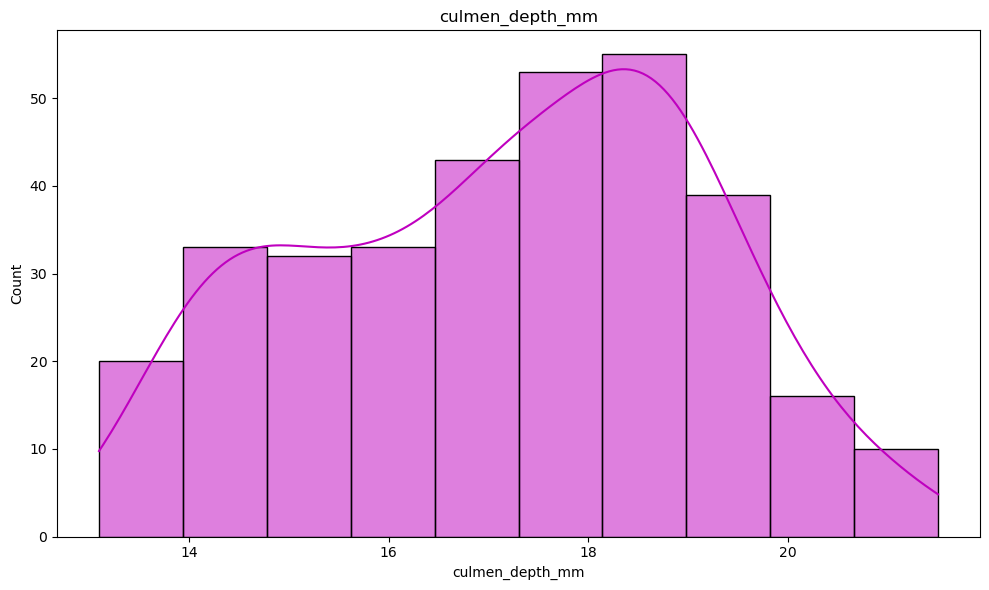

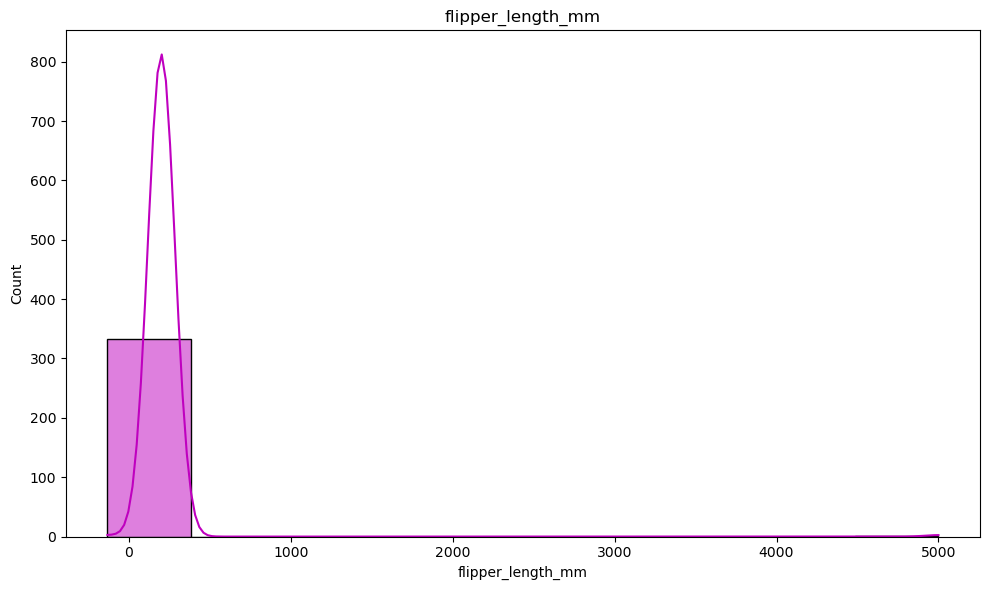

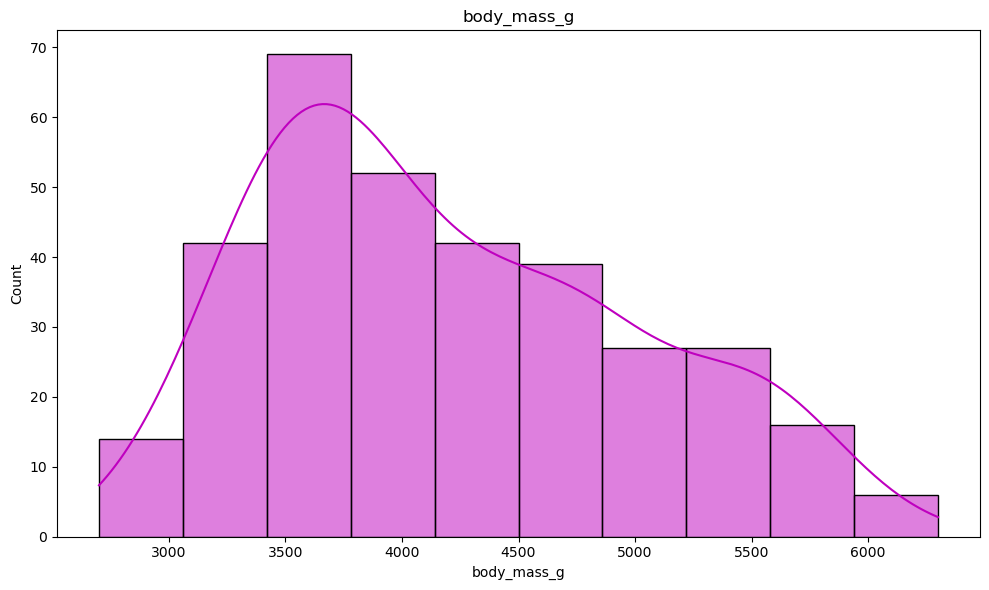

In [17]:
for col in numeric_col:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=10, color='m')
    plt.title(f'Histogram Plot: {col} ')    

    plt.tight_layout()
    plt.title(str(col))
    plt.show()

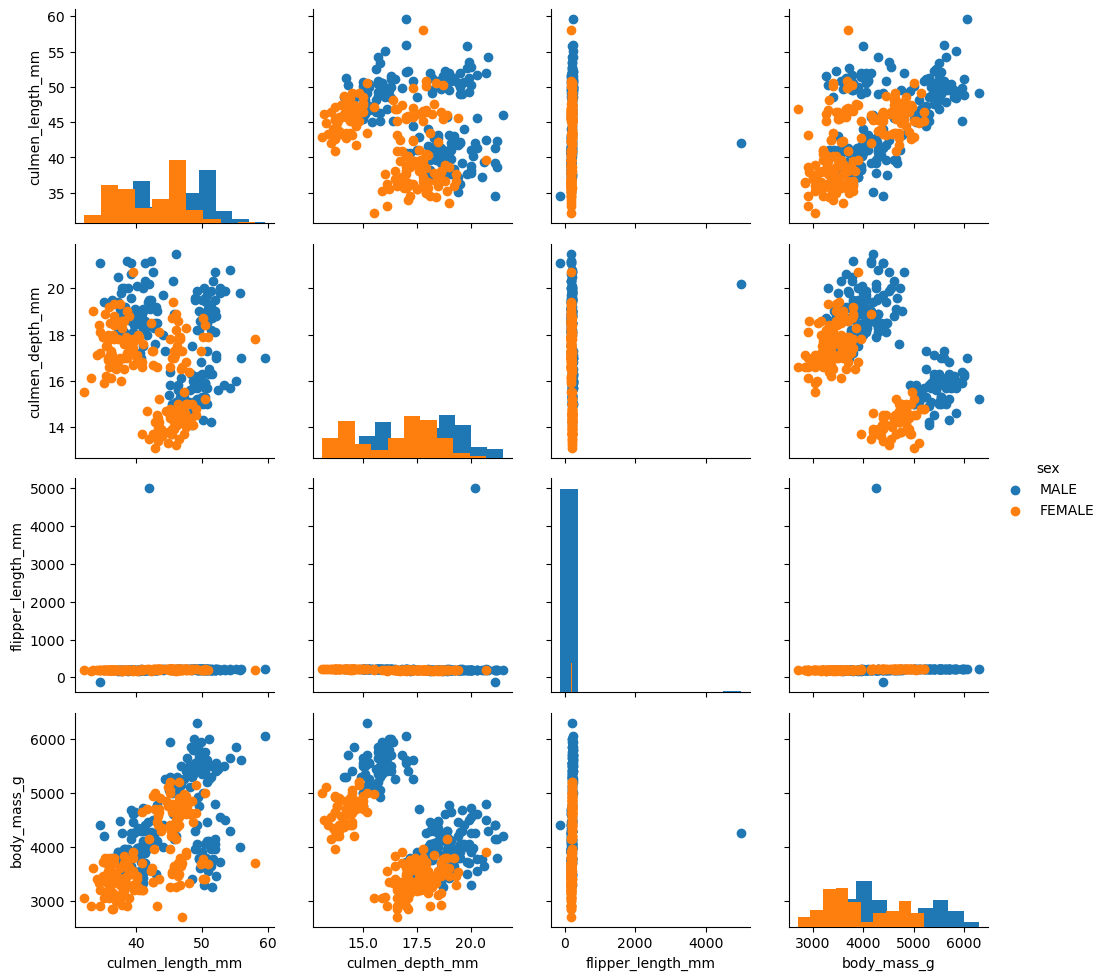

In [16]:
g = sns.PairGrid(df, hue="sex")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()


<AxesSubplot:>

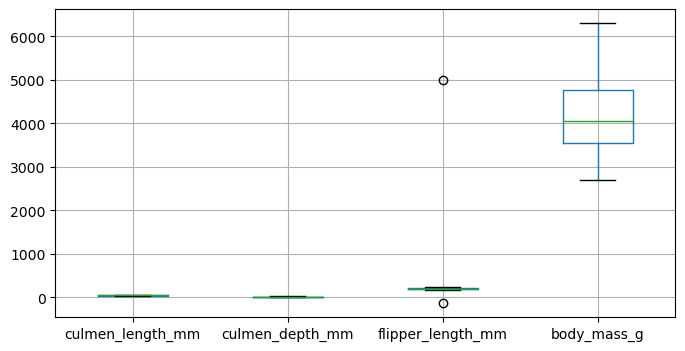

In [19]:
plt.figure(figsize=(8,4))
df.boxplot()

In [20]:
print(df[df["flipper_length_mm"] > 4000])
print(df[df["flipper_length_mm"] < 0])

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9              42.0             20.2             5000.0       4250.0  MALE
    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
14              34.6             21.1             -132.0       4400.0  MALE


In [21]:
df=df.drop([9, 14])

In [22]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [23]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()#change categorical column into numerical column
df['sex']=le.fit_transform(df['sex'])

In [25]:
scaler = StandardScaler()#Normalize data
X = scaler.fit_transform(df)
new_df = pd.DataFrame(data=X, columns=df.columns)
new_df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,-1.006042


In [26]:
pca = PCA(n_components=None)#determine PCA column
df_pca = pca.fit(new_df)
df_pca.explained_variance_ratio_
n_components = sum(df_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
new_df_pca = pca.fit_transform(new_df)
print(n_components)

2


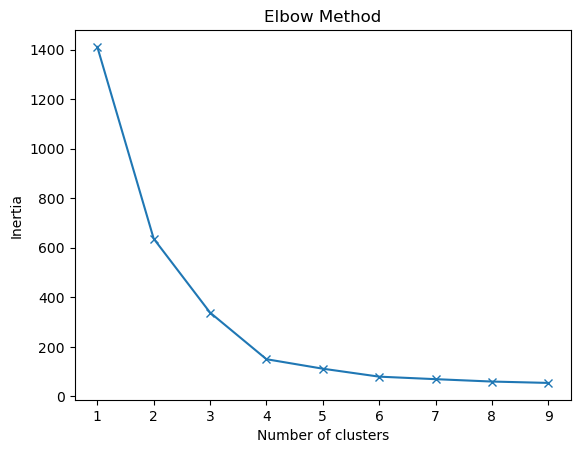

In [27]:
#Elbow medhod to find optimal number of cluster
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(new_df_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse, marker="x")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [28]:
print(sse)

[1410.5642982072338, 636.7094413005511, 338.4731734509613, 150.2475880041069, 111.94256881849881, 79.83523904294984, 69.685501090108, 60.07491753237163, 54.52139355214025]


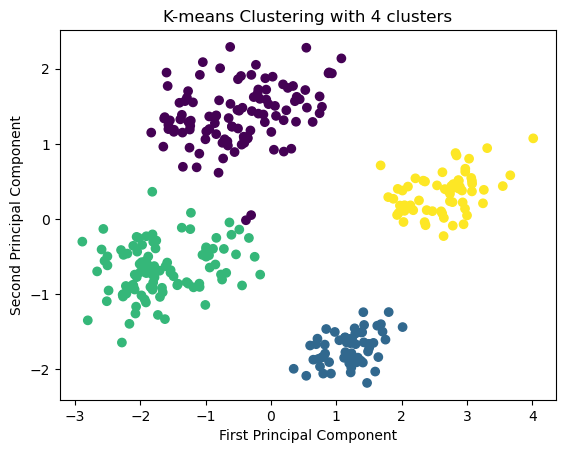

In [29]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(new_df_pca)
plt.scatter(new_df_pca[:, 0], new_df_pca[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering with 4 clusters")
plt.show()